# 7.1 시나리오

- 영화 평점 데이터 "무비렌즈<sup>MovieLens</sup>" 사용
- 추천 알고리즘, 데이터 입수 방법, 평가 척도 확인
- 어떤 사용자가 아직 시청하지 않은 영화에 내릴 평점 예측
- 예측 결과는 DB에 저장하고 웹 애플리케이션에서 이 결과를 참조하도록 구성

### 7.1.1 추천 시스템이란

- 어떤 사용자 행동이나 아이템에 대한 정보로부터 사용자가 선호활 만한 관련 아이템을 제시하는 것

### 7.1.2 응용 분야

- 추천 시스템의 응용 유형 5가지
    - 개요 추천: 개인화 되지 않은 추천
    - 사용자 평가: 다른 사람의 별점이나 댓글, 평균 평점 등을 판단 근거로 노출
    - 알림 서비스: 푸시 알림이나 이메일로 사용자가 흥미를 느낄만한 아이템을 추천
    - 연관 아이템 추천: 구매한 아이템과 연관된 아이템 제시
    - 개인화: 사용자가 흥미를 느낄만한 아이템 노출 또는 검색 결과 개인화

---

# 7.2 추천 시스템 제대로 알기

### 7.2.1 데이터 설계와 데이터 입수

- 자주 사용되는 입력 데이터
    - 선호 데이터: 사용자의 선호도
    - 검색 쿼리: 검색어 정보
    - 비평: 댓글평 등
    - 아이템 특징: 상품 설명에 쓰인 단어
    - 인구적 특징: 사용자의 성별, 연령 등의 정보
    - 맥락적 특징: 추천 받은 아이템 사용 날짜, 위치, 재고 현황 등
- 데이터가 희소하다(인기 없는 영화는 평이 별로 없는 것과 같은 현상).
- 평가 비용을 낮추거나, 평가 개수가 적어도 문제 없도록 하는 방법을 사용

### 7.2.2 명시적 데이터와 묵시적 데이터

- **명시적 데이터**<sup>explicit data</sup>: 선호도나 관심도에 대한 직접적인 답변
- **묵시적 데이터**<sup>implicit data</sup>: 사용자의 행위를 통해 해석할 수 있는 정보
- 선호 데이터 입수 방법의 장단점

|종류|명시적|묵시적|
|---|---|---|
|데이터양|X|O|
|데이터의 정확성|O|X|
|미평가와 부정적 평가 구별|O|X|
|사용자의 인지|O|X|

- 묵시적 데이터의 품질을 확보하기 위해서는 전처리가 필요
- 영화를 관람하지 않은 행동은 미평가인지 부정적 평가인지 구분하기 어려움
- 사용자가 데이터 제공을 인지하는 경우 시스템이 근거있는 결과를 제시한 것으로 생각해 좋은 인상을 받을 수 있음

### 7.2.3 추천 시스템의 알고리즘

- 추천 시스템 알고리즘 두 가지
    1. **협업 필터링**<sup>collaborative filtering</sup>: 평가 경향이 비슷한 사람을 찾거나 비슷한 평가를 받은 영화를 찾는 식. **메모리 기반 협업 필터링**<sup>memory-based collaborative filtering</sup>의 일종. 그 외의 접근법으로 **모델 기반 협업 필터링**<sup>model-based collaborative filtering</sup>도 있다.
        - **사용자 기반 협업 필터링**<sup>user-based collaborative filtering</sup>
        - **아이템 기반 협업 필터링**<sup>item based collaborative filtering</sup>
    2. **내용 기반 필터링**<sup>content-based filtering</sup>: 감독, 장르, 제목에 포함된 단어나 내용이 비슷한 영화를 찾는 식
    
### 7.2.4 사용자 기반 협업 필터링

- '당신과 비슷한 상품을 산 고객은 이런 상품도 샀다'는 식의 추천
- 과정
    1. 사용자 정보를 벡터로 나타낸다.
    2. 사용자 간의 유사도를 평가한다.
    3. 유사도를 기반으로 평점을 계산한다.
- 대표적인 유사도
    - **피어슨 상관계수**<sup>Pearson product-moment correlation coefficient</sup>: 일반적인 상관계수
    - **코사인 유사도**<sup>cosine similarity</sup>: 텍스트 문장 간의 거리를 측정하는 척도로 0~1 사이의 값을 갖는다.
    - **자카드 계수**<sup>Jaccard index, Jaccard similarity coefficient</sup>: 집합과 집합 사이의 거리 계산. 0~1 사이의 값을 갖는다.

In [1]:
import numpy as np

##########################################################################
# 피어슨 상관계수
##########################################################################
def pearson_coefficient(u, v):
    u_diff = u - np.mean(u)
    v_diff = v - np.mean(v)
    numerator = np.dot(u_diff, v_diff)
    denominator = np.sqrt(sum(u_diff ** 2)) * np.sqrt(sum(v_diff ** 2))
    return numerator / denominator

# scipy를 이용한 피어슨 상관계수
from scipy.spatial.distance import correlation
1 - correlation(u, v)

##########################################################################
# 코사인 유사도
##########################################################################
np.dot(u, v) / (np.sqrt(sum(u ** 2)) * np.sqrt(sum(v ** 2)))

# scipy를 이용한 코사인 유사도
from scipy.spatial.distance import cosine
1 - cosine(u, v)

##########################################################################
# 자카드 계수
##########################################################################
np.dot(u, v) / (sum(np.absolute(u)) + sum(np.absolute(v)) - np.dot(u, v))

# scipy를 이용한 자카드 계수
from scipy.spatial.distance import jaccard
1 - jaccard(u, v)

NameError: name 'u' is not defined

- 사용자 기반 협업 필터링 중에는 성향이 비슷한 사용자가 선호하는 아이템을 제시하는 방법이 가장 간단함
- 평점을 예측하는 가장 단순한 방법은 가장 비슷한 k 명의 사용자 평가를 평균하는 것이다.
- 사용자 간의 유사도를 가중치로 주어 예측값을 구할 수도 있다.

### 7.5.2 아이템 기반 협업 필터링

- 메모리 기반 기법의 일종으로 피어슨 상관계수나 코사인 유사도를 이용하여 유사도가 높은 아이템을 찾는다.
- 코사인 유사도를 개선한 **개선된 코사인 유사도**<sup>adjusted cosine similarity</sup>를 사용하기도 한다.
- 앞서 pearson_coefficient(u, v) 함수에서 u를 영화 M의 평점 벡터 m으로 치환하고 v를 영화 N의 평점 벡터 n으로 치환하면 아이템 기반 협업 필터링에 사용할 피어슨 상관계수를 구할 수 있다.
- 아이템 기반 협업 필터링에서는 분모로 영화 M에 대한 평점 평균을 이용하는데 대신에 사용자 평점 평균으로 나누면 개선된 코사인 유사도가 된다.
- 사용자의 평점 평균을 빼면 높은 점수를 주는 사용자와 낮은 점수를 주는 사용자의 차이를 제거할 수 있어서 예측 성능이 좋아진다.
- 사용자 기반과 아이템 기반 방식의 갱신 빈도는 훈련 데이터의 증가 속도가 결정한다.

In [2]:
##########################################################################
# 개선된 코사인 유사도
##########################################################################
def pearson_coefficient(m, n, u_mean):
    adjusted_m = m - u_mean
    adjusted_n = n - u_mean
    numerator = np.dot(adjusted_m, adjusted_n)
    denominator = np.sqrt(sum(adjusted_m ** 2)) * np.sqrt(sum(adjusted_n ** 2))
    return numerator / denominator

### 7.2.6 모델 기반 협업 필터링

- 지도 학습 및 비지도 학습으로 모델을 학습하여 기존 데이터가 갖는 규칙성에 따라 예측하는 방법
- 사용하는 모델의 종류
    - 군집화 사용 모델
    - 평점에 대한 회귀 모델
    - **토픽 모델**<sup>topic model</sup>: 평점 행렬의 차원을 축소하여 잠재적 의미가 드러나게 하는 기법. 묵시적 데이터로도 예측이 가능
        - **확률적 잠재 의미 분석**<sup>probabilistic latent semantic analysis</sup>(PLSA)
        - **잠재 디리클레 할당**<sup>latent Dirichlet allocation</sup>(LDA)
    - **행렬 분해**<sup>matrix decomposition</sup>를 사용한 방법: 명시적 데이터에만 적용 가능
        - **행렬 인수분해**<sup>matrix factorization</sup>: 묵시적 데이터 사용 가능. 희소행렬인 평점 행렬을 사용자 행렬과 아이템 행렬로 나누어 밀집행렬로 만든다.
        
### 7.2.7 내용 기반 필터링

- 영화제목, 감독, 장르, 배우, 평판 등 아이템을 나타내는 정보에 주목

### 협업 필터링과 내용 기반 필터링의 장단점

- 협업 필터링
    - 장르나 텍스트에 포함된 단어에 유사점이 없어도 됨
    - 비교적 다양한 추천 결과
    - 도메인 지식 관리 필요 없음
    - 충분한 데이터 필요(데이터가 쌓이기 전에는 신규 사용자나 새로운 아이템에 대한 추천이 어려움 - 적절한 추천 불가 -> 사용자가 늘지 않는 악순환 우려)
- 내용 기반 필터링
    - 누적된 행동 데이터가 없어도 비교적 적절한 추천이 가능
    - 한국어에 적용 시 형태소 분석, 사전 유지보수 등이 어려움
    
### 7.2.9 평가 척도

- **정확도**<sup>accuracy</sup>: 예측 결과와 사용자의 평점을 비교
- **정밀도**<sup>precision</sup>, **재현율**<sup>recall</sup>: 예측 결과 중 정답의 비율과 전체 정답 중 실제 맞춘 정답의 비율. 분류 문제 평가 시 사용
- **평균절대오차**<sup>mean absolute error</sup>(MAE): 예측값과 실젯값의 차이에 대한 절댓값으로 평점을 계산. 회귀에서 쓰이는 평가 척도
- **평균제곱근오차**<sup>root mean squared error</sup>: 예측값과 실젯값의 차이를 제곱한 값. 회귀에서 쓰이는 평가 척도. 이상값<sup>outlier</sup>에 취약.
- **순위상관**<sup>rank correlation</sup>: 추천한 아이템의 순서를 평가하는 지표. **랭킹 학습**<sup>lean to rank</sup>에 많이 사용.
- **다양성**<sup>diversity</sup>을 평가 지표에 포함 시키는 경우 전체 아이템 중 평점을 예측할 수 있는 아이템의 비율을 나타내는 **커버리지**<sup>coverage</sup>를 지표롤 사용하기도 한다.

---

# 7.3 무비렌즈 데이터 분석하기

- 코드 저장소: https://github.com/flourscent/ml-at-work
- 전체 데이터를 다운로드 받고 압축 풀기

In [3]:
import pandas as pd
import numpy as np
import requests, zipfile
from io import BytesIO
import os

print('Downloading started')

#Defining the zip file URL
url = 'http://files.grouplens.org/papers/ml-100k.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
req = requests.get(url)
print('Downloading Completed')

# 디렉토리 생성
if not os.path.exists('./data'):
    os.makedirs('./data')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('./data')


---
- 사용자 정보 추출 후 확인
---

In [4]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./data/ml-100k/u.user', sep='|', names=u_cols)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


---
- rating 정보 추출 후 확인
---

In [5]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=r_cols)
ratings['date'] = pd.to_datetime(ratings['unix_timestamp'],unit='s')
ratings.head()

,user_id,movie_id,rating,unix_timestamp,date
0,196,242,3,881250949,1997-12-04 15:55:49
1,186,302,3,891717742,1998-04-04 19:22:22
2,22,377,1,878887116,1997-11-07 07:18:36
3,244,51,2,880606923,1997-11-27 05:02:03
4,166,346,1,886397596,1998-02-02 05:33:16


---
- 영화 정보 추출 후 확인
---

In [6]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('./data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin1')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


---
- 모든 정보를 병합해 평점 예측에 사용할 준비
---

In [7]:
movie_rating = pd.merge(movies, ratings)
lens = pd.merge(movie_rating, users)

---
- 전체 데이터 중 평점을 가장 많이 받은 25개의 작품
---

In [8]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

---
- 평점 수와 평균을 계산하고 평균이 높은 순서로 정렬
---

In [9]:
movie_stats = lens.groupby('title').agg({'rating':[np.size, np.mean]})
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

---
- 평점 수가 적은 경우 평균에 노이즈가 들어가기 쉽다.
- 이를 방지하기 위해 평점 수가 일정 횟수 이상일 경우에만 평균을 내는 방법을 생각해볼 수 있다.
- 평점 수가 100건 이상인 영화만 평균이 높은 순으로 정렬하는 코드
---

In [10]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values(by=[('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

---
- 사용자별 평가 횟수 분포 시각화(히스토그램)
---


In [11]:
import matplotlib.font_manager as fm
from matplotlib import rc

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:]

['/Users/mazdah/Library/Fonts/NanumSquare_acL.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansNewa-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Marion.ttc',
 '/System/Library/Fonts/Supplemental/Oriya MN.ttc',
 '/System/Library/Fonts/Supplemental/Zapfino.ttf',
 '/System/Library/Fonts/Supplemental/Mshtakan.ttc',
 '/System/Library/Fonts/KohinoorBangla.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf',
 '/Users/mazdah/Library/Fonts/NanumBarunpenR.ttf',
 '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansCaucasianAlbanian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSerifYezidi-Regular.otf',
 '/System/Library/Fonts/Supplemental/NotoSansHanifiRohingya-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc',
 '/System/Library/Fonts/KohinoorGujarati.ttc',
 '/System/Library/Fonts/Supplemental/Rockwell.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf',
 '/System/Library/Fon

In [12]:
fm.get_fontconfig_fonts()
fontpath = '/Users/mazdah/Library/Fonts/NanumSquare_acR.ttf'
font = fm.FontProperties(fname=fontpath).get_name()
rc('font', family=font)
print(font)

/var/folders/t4/mtkrqnk14yn1j76qhsrvnfvw0000gn/T/ipykernel_14344/2881687773.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


NanumSquare_ac


Text(0, 0.5, '(사용자별) 평가 횟수')

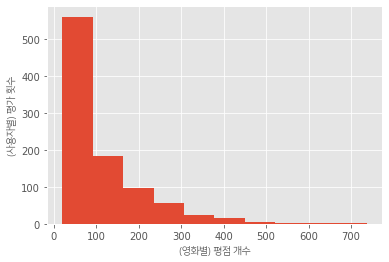

In [17]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

# user_id별 평가 횟수의 히스토그램
lens.groupby('user_id').size().sort_values(ascending=False).hist()

plt.rc('font', family=font)
plt.xlabel('(영화별) 평점 개수', fontproperties=fm.FontProperties(fname=fontpath))
plt.ylabel('(사용자별) 평가 횟수', fontproperties=fm.FontProperties(fname=fontpath))

---
- 사용자별 평가 횟수와 평점 평균
---

In [18]:
user_stats = lens.groupby('user_id').agg({'rating': [np.size, np.mean]})
user_stats['rating'].describe()

,size,mean
count,943.000000,943.000000
mean,106.044539,3.588191
std,100.931743,0.445233
min,20.000000,1.491954
25%,33.000000,3.323054
50%,65.000000,3.620690
75%,148.000000,3.869565
max,737.000000,4.869565


---

# 7.4 추천 시스템 구현하기

### 7.4.1 인수분해 머신을 이용한 추천

- **인수분해 머신**<sup>factorization machine</sup>: 행렬 인수분해를 일반화한 알고리즘
- 인수분해 머신의 특성
    - 사용자와 아이템 정보 외의 특징도 다룰 수 있다.
    - 로지스틱 회귀와 달리, 희소한 행렬을 다룰 수 있다.
    - 상관관계를 갖는 특징들도 잘 다룰 수 있다.
- 인수분해 머신이 제공하는 각종 라이브러리를 이용하여 회귀, 분류, 랭킹 학습 등을 할 수 있다.
- 구현체로는 libFM이 유명하다. 파이썬 구현체는 fastFM

- fastFM으로 사용할 수 있는 알고리즘들
    - 교대 최소 제곱법<sup>alternated least squared</sup>
        - 장점: 예측 시간이 빠르다. SGD보다 하이퍼파라미터 수가 적다.
        - 단점: 규제가 필수다.
    - 확률적 경사하강법(SGD)
        - 장점: 예측 시간이 빠르다. 대규모 데이터를 빠르게 학습할 수 있다.
        - 단점: 규제가 필수다. 하이퍼파라미터 수가 많다.
    - 마르코프 연쇄 몬테카를로<sup>Markov chain Monte Carlo</sup>(MCMC)
        - 장점: 하이퍼파라미터 수가 적다. 자동 규제가 가능하다.
        - 단점: 학습에 어느 정도 시간이 걸린다.

---
> M1 맥미니에서 fastFM 설치가 되지 않아 실습은 구글 colab에서 진행  
> https://github.com/mazdah/AIStudy/blob/master/머신러닝_실무_프로젝트_7장_fastFM_예제.ipynb
--- 

In [2]:
!pip install fastFM

  Using cached fastFM-0.2.10.tar.gz (1.6 MB)
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mlConda/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/t4/mtkrqnk14yn1j76qhsrvnfvw0000gn/T/pip-install-h13obb0x/fastfm_5a0d012e49ea422b812b78be679efb7c/setup.py'"'"'; __file__='"'"'/private/var/folders/t4/mtkrqnk14yn1j76qhsrvnfvw0000gn/T/pip-install-h13obb0x/fastfm_5a0d012e49ea422b812b78be679efb7c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/t4/mtkrqnk14yn1j76qhsrvnfvw0000gn/T/pip-wheel-bbw0otc1
       cwd: /private/var/folders/t4/mtkrqnk14yn1j76qhsrvnfvw0000gn/T/pip-install-h13obb0x/f